In [70]:
from qiskit import *
from qiskit.quantum_info import *
import numpy as np
# from qiskit.quantum_info import DensityMatrix,partial_trace
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [71]:
# function to generate parametrized bell  

def fn_pbs_circ(theta):
    #circuit 2 qubit 
    qc = QuantumCircuit(2)
    # qc.h(1)
    qc.ry(theta,0)
    qc.cx(0,1)

# density matrix corresponding to state generated (2 qubit)
    rho = DensityMatrix(qc)
    

    return qc, rho

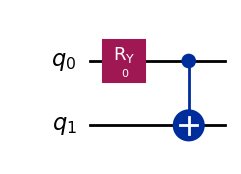

In [72]:
fn_pbs_circ(0)[0].draw('mpl')

In [73]:
fn_pbs_circ(0)[1]

DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


In [74]:
fn_pbs_circ(np.pi/2)[1]

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


In [75]:
#purity 
purity(fn_pbs_circ(np.pi/2)[1])

np.complex128(1+0j)

In [76]:
qc1 = QuantumCircuit(2)
qc1.h(0)
# qc1.h(1)
# qc1.ry(theta,0)
qc1.cx(0,1)

# density matrix corresponding to state generated (2 qubit)
rho1 = DensityMatrix(qc1)
rho1

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


In [80]:
#partial tarce
partial_trace(state=rho1, qargs=[0])

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [81]:
purity(partial_trace(state=rho1, qargs=[0]))

np.complex128(0.4999999999999998+0j)

In [77]:
#partial tarce
partial_trace(state=fn_pbs_circ(0)[1], qargs=[0])


DensityMatrix([[1.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j]],
              dims=(2,))


In [78]:
purity(partial_trace(state=fn_pbs_circ(0)[1], qargs=[1]))

np.complex128(1+0j)

In [ ]:
partial_trace(state=fn_pbs_circ(0)[1], qargs=[0])

In [ ]:
partial_trace(state=fn_pbs_circ(np.pi/2)[1], qargs=[0])

In [ ]:
purity(partial_trace(state=fn_pbs_circ(np.pi/2)[1], qargs=[1]))

In [117]:
# # schmidt_decomposition
# schmidt_decomposition(fn_pbs_circ(np.pi/2)[1],[1])

In [118]:
# schmidt_decomposition(rho1,[1])

In [119]:
# # schmidt_decomposition
# schmidt_decomposition(fn_pbs_circ(np.pi/2)[1],[1])

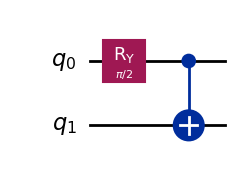

In [120]:
fn_pbs_circ(np.pi/2)[0].draw('mpl')

In [121]:
fn_pbs_circ(np.pi/2)[1]

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


In [122]:
# qiskit inbuilt function 
theta = np.arange(0,np.pi/2,0.1)
rho_mat = []
for i in range(len(theta)):
        qc,rho =fn_pbs_circ(theta[i])
        rho_mat.append(rho)


<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
/var/folders/d1/x6kjgrmn6dx696cv25ynnn580000gn/T/ipykernel_21293/3152002568.py:11: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("$\u03b8 (\pi)$", fontsize=11)


Text(0, 0.5, 'S($ρ$)')

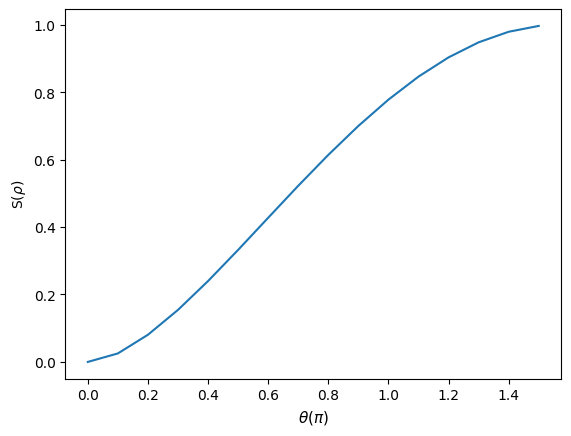

In [123]:
#von-Neumann entropy 
#S(ρ)=−Tr[ρlog(ρ)] = sum(-eig log(eig))
sa=[]
for i in range(len(theta)):
        rho_0=partial_trace(state=rho_mat[i], qargs=[1])
        en=entropy(rho_0)
        sa.append(en)


plt.plot(theta,sa)
plt.xlabel("$\u03b8 (\pi)$", fontsize=11)
plt.ylabel("S($\u03c1$)") 


Text(0, 0.5, '$E_{f}(\\rho_{12})$')

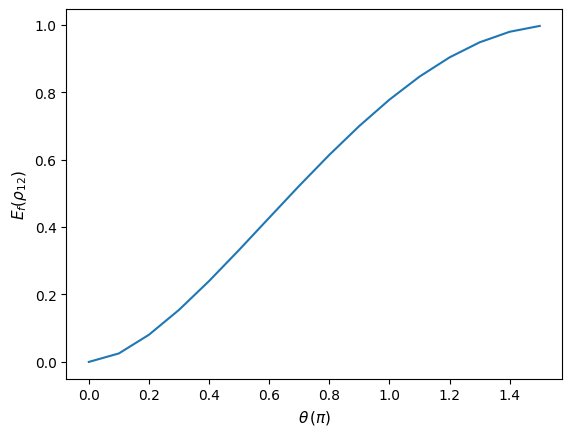

In [124]:
# is there any difference ?
ef=[]
for i in range(len(theta)):
        # rho_0=partial_trace(state=den_mat[i], qargs=[1])
        e= entanglement_of_formation(rho_mat[i])
        ef.append(e)

plt.plot(theta, ef)
plt.xlabel(r"$\theta \, (\pi)$", fontsize=11)
plt.ylabel(r"$E_{f}(\rho_{12})$", fontsize=11)

# plt.plot(theta, ef)
# plt.xlabel("$\u03b8 (\pi)$", fontsize=11)
# plt.ylabel("$E_{f}(\u03c1_{12})$")

In [125]:
#Task apply local unitary operation on entangled quantum states and observe results for entropy

In [126]:
def fn_pbs_circ_con(theta):
    #circuit 2 qubit 
    qc = QuantumCircuit(2)
    qc.ry(theta,0)
    qc.cx(0,1)

# density matrix corresponding to state generated (2 qubit)
    rho = DensityMatrix(qc)
   

    rho_star = np.conjugate(rho)

    y = np.array([[0, -1j],[1j, 0]])
    y_tensor = np.kron(y,y).real


    #print(rho,rho_tilda)
    rho_tilta = np.matmul(y_tensor, np.matmul(rho_star ,y_tensor))
    rho_final = np.matmul(rho, rho_tilta)
    values,vectors = eig(rho_final)
    eig_value = values.round(3)
    eig_vector = vectors.round(3)
    eig_value.sort()
    #print(eig_value.real)
    lambda1 = np.sqrt(eig_value[3])
    lambda2 = np.sqrt(eig_value[2])
    lambda3 = np.sqrt(eig_value[1])
    lambda4 = np.sqrt(eig_value[0])
    # max eigenvalue sqrt
    # max_eig_val= max(lambda1,lambda2,lambda3,lambda4)
    # sum of other eigenvalues sqrt
    # sum_oth=  ( lambda1 + lambda2 +lambda3 + lambda4 ) - max_eig_val

# concurrence 
    # conc = max(0,np.real(max_eig_val -sum_oth))
    conc = max(0,np.real(lambda1 - lambda2 -lambda3 - lambda4 ))

    return qc,rho, conc


In [127]:
theta = np.arange(0,np.pi/2,0.1)
con_list =[]
den_mat = []
for i in range(len(theta)):
        qc,rho, conc=fn_pbs_circ_con(theta[i])
        den_mat.append(rho)
        con_list.append(conc)

Text(0, 0.5, 'concurrence')

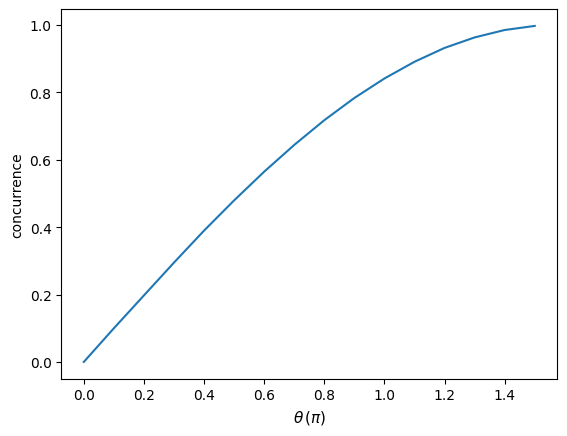

In [128]:


plt.plot(theta,con_list)
plt.xlabel(r"$\theta \, (\pi)$", fontsize=11)
plt.ylabel("concurrence")

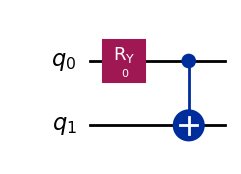

In [129]:
fn_pbs_circ(0)[0].draw('mpl')

In [130]:
concurrence(fn_pbs_circ(0)[1])

0.0

In [131]:
np.sin(np.pi/4)

np.float64(0.7071067811865475)

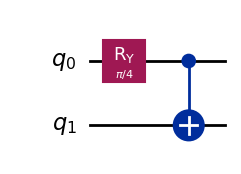

In [132]:
fn_pbs_circ(np.pi/4)[0].draw('mpl')

In [133]:
concurrence(fn_pbs_circ(np.pi/2)[1])

np.float64(0.9999999937348335)

In [134]:
# qiskit inbuilt function 
theta = np.arange(0,np.pi/2,0.1)
con_list_1 =[]
den_mat_1 = []
for i in range(len(theta)):
        qc,rho =fn_pbs_circ(theta[i])
        den_mat_1.append(rho)
        conc=concurrence(fn_pbs_circ(theta[i])[1])
        con_list_1.append(conc)

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
/var/folders/d1/x6kjgrmn6dx696cv25ynnn580000gn/T/ipykernel_21293/4274401937.py:2: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel("$\u03b8 (\pi)$", fontsize=11)


Text(0, 0.5, 'concurrence')

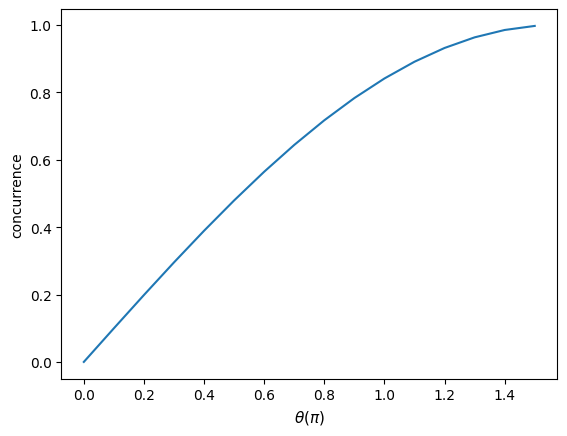

In [135]:


plt.plot(theta,con_list_1)
plt.xlabel("$\u03b8 (\pi)$", fontsize=11)
plt.ylabel("concurrence")

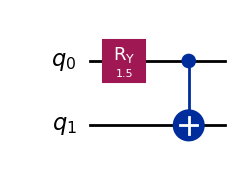

In [136]:
# lets ask individual question to entangled particles 
# (sigma \tesnor I) and (I \tesnor sigma )
concurrence(fn_pbs_circ(0)[1])
# qc.x(0)
qc.draw('mpl')

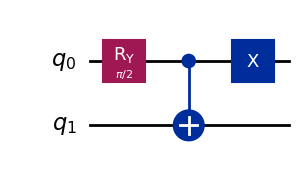

In [137]:
qc1=fn_pbs_circ(np.pi/2)[0]
qc1.x(0)
qc1.draw('mpl')

In [138]:
fn_pbs_circ(np.pi/2)[0]

In [139]:
# aksing individual questions (ZI,IZ,...) and combined question (ZZ, XX,YY)


In [140]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Pauli

ZZ=Pauli('ZZ')
YY=Pauli('YY')
XX=Pauli('XX')
IZ=Pauli('IZ')
ZI=Pauli('ZI')
IX=Pauli('IX')
XI=Pauli('XI')
IY=Pauli('IY')
YI=Pauli('YI')
observables = [ZZ ,YY,XX, IZ, ZI,IX, XI,IY, YI]

estimator = Estimator()
 

# The circuit needs to be transpiled to the AerSimulator target
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=AerSimulator())
isa_circuit = pass_manager.run(qc1)

pub = (isa_circuit, observables[2])

job = estimator.run([pub])
result = job.result()
pub_result = result[0]
exa_value = float(pub_result.data.evs)
exa_value

1.0

In [141]:
for i in range(len(observables)):
    pub = (isa_circuit, observables[i])

    job = estimator.run([pub])
    result = job.result()
    pub_result = result[0]
    exa_value = float(pub_result.data.evs)
    print(exa_value)

-1.0
1.0
1.0
-2.220446049250313e-16
2.220446049250313e-16
0.0
0.0
0.0
0.0


In [142]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Pauli

ZZ=Pauli('ZZ')
YY=Pauli('YY')
XX=Pauli('XX')
IZ=Pauli('IZ')
ZI=Pauli('ZI')
IX=Pauli('IX')
XI=Pauli('XI')
IY=Pauli('IY')
YI=Pauli('YI')
observables = [ZZ ,YY,XX, IZ, ZI,IX, XI,IY, YI]

estimator = Estimator()
 

# The circuit needs to be transpiled to the AerSimulator target
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=AerSimulator())
isa_circuit = pass_manager.run(fn_pbs_circ(0)[0])

pub = (isa_circuit, observables[2])

job = estimator.run([pub])
result = job.result()
pub_result = result[0]
exa_value = float(pub_result.data.evs)
exa_value

0.0

In [143]:
for i in range(len(observables)):
    pub = (isa_circuit, observables[i])
    job = estimator.run([pub])
    result = job.result()
    pub_result = result[0]
    exa_value = float(pub_result.data.evs)
    print(exa_value)

1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
